# Apprentissage non supervisé
Le but de l'apprentissage non supervisé est de découvrir les modèles ou structures cachés des données dans lesquelles aucune variable cible n'existe pour effectuer des méthodes de classification ou de régression. Les méthodes d'apprentissage non supervisé sont souvent plus difficiles, car les résultats sont subjectifs et il n'y a pas d'objectif simple pour l'analyse, comme prédire la classe ou la variable continue. Ces méthodes sont réalisées dans le cadre de l'analyse exploratoire des données. En plus de cela, il peut être difficile d'évaluer les résultats obtenus à partir de méthodes d'apprentissage non supervisées, car il n'existe aucun mécanisme universellement accepté pour effectuer la validation des résultats, y travaillent activement en ce moment pour explorer ce nouvel horizon.

**Quelques bonnes applications sont :**

- **Génomique :** Apprentissage non supervisé appliqué à la compréhension des connaissances génomiques et biologiques de l'ADN pour mieux comprendre les maladies et les peuples. Ces types de tâches sont de nature plus exploratoire. 
- **Moteur de recherche :** les moteurs de recherche peuvent choisir les résultats de recherche à afficher pour un individu particulier en fonction de l'historique des clics d'autres utilisateurs similaires. 
- **Extraction de connaissances** : pour extraire les taxonomies des concepts du texte brut afin de générer le graphe de connaissances pour créer les structures sémantiques dans le domaine de la NLP. 
- **Segmentation des clients :** dans le secteur bancaire, l'apprentissage non supervisé comme le clustering est appliqué pour regrouper des clients similaires, et sur la base de ces segments, les départements marketing conçoivent leurs stratégies de contact. Par exemple, les clients plus âgés et à faible risque seront ciblés avec des produits de dépôt fixe et les clients à haut risque, les plus jeunes seront ciblés avec des cartes de crédit ou des fonds communs de placement, etc. sont plus liés les uns aux autres et ont des caractéristiques similaires en commun.
- **Analyse des réseaux sociaux :** pour identifier les groupes cohésifs de personnes dans les réseaux qui sont plus connectés les uns aux autres et ont des caractéristiques similaires en commun.

# k-means

L'algorithme de clustering **k-means** est un processus itératif consistant à déplacer les centres des clusters ou des centroïdes vers la position moyenne de leurs points constitutifs, et à réaffecter les instances aux clusters les plus proches de manière itérative jusqu'à ce qu'il n'y ait pas de changement significatif dans le nombre de clustercenters possible ou le nombre d'itérations atteint .

## Nombre optimal de clusters et évaluation des clusters

Bien que la sélection du nombre de clusters soit plus un art qu'une science, le nombre optimal de clusters est choisi là où il n'y aura pas d'augmentation marginale de la capacité d'explication en augmentant le nombre de clusters. Dans les applications pratiques, les entreprises devraient généralement être en mesure de fournir le nombre approximatif de clusters qu'elles recherchent.

## Exercice 

- Les fameuses données d'iris  ont trois types de fleurs : setosa, versicolor et virginica et leurs mesures respectives de longueur de sépale, de largeur de sépale, de longueur de pétale et de largeur de pétale. Notre tâche est de regrouper les fleurs en fonction de leurs mesures.

- Comme métriques d'échantillon, trois clusters ont été utilisés, **mais dans la vraie vie**, nous ne savons pas à l'avance combien de clusters les données tomberont.

- Pour réitérer, dans des exemples réels, Nous n'avons pas les noms de catégorie à l'avance, nous allons travailler que sur features on n'a pas le droit d'utiliser Target.

**Votre mission sera de chercher nombres optimal de clusters dans les données d'iris en se basant seuleument sur les features.**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [5]:
iris = datasets.load_iris()    # dataset fleur d'iris

In [6]:
data=iris.data # dataset d'exercice 

In [7]:
#we are usingh
df=pd.DataFrame(iris['data'])

df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Méthode elbow 

In [9]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

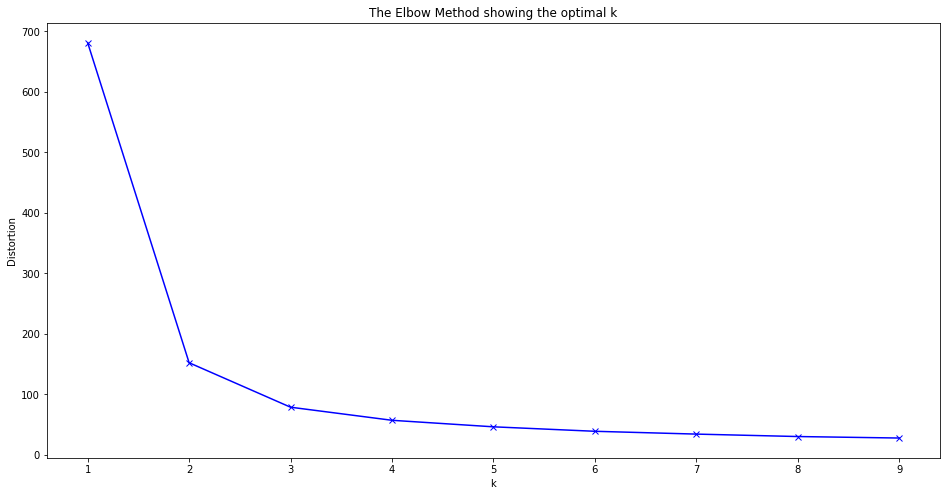

In [10]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [11]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)

KMeans(n_clusters=3)

Text(0.5, 1.0, 'K_Means')

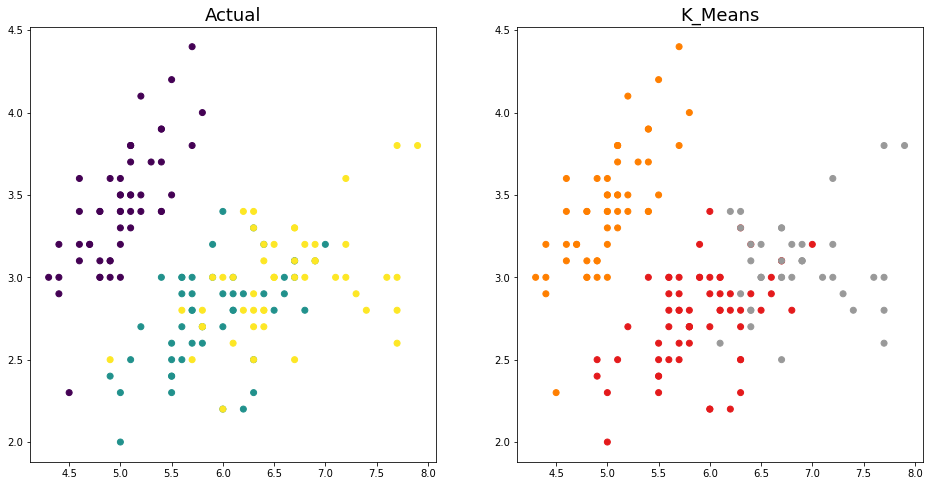

In [12]:
df['k_means']=kmeanModel.predict(df)
df['target']=iris['target']

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df[0], df[1], c=df['target'])
axes[1].scatter(df[0], df[1], c=df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

## Silhouette